### **Columbia University**
### **ECBM E4040 Neural Networks and Deep Learning. Fall 2021.**

## **Task 2: RNN application -- Tweet Sentiment Analysis**

In this task, you are going to classify the sentiment in tweets into positive and negative using an LSTM model. The code to load the data and see its characteristics has been provided to you. 

In the first task, you will encode the data using using one hot encoding and train an LSTM network to classify the sentiment. In the second task, you will replace the one hot encoding with an embedding layer and train another LSTM model. You will then extract the trained embeddings and visualize the word embeddings in 2 dimensions by using TSNE for dimenssionality redution. 

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
import json
import time
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Load Data


In [2]:
with open("./tweets_data/vocabulary.pkl", "rb") as f:
    vocabulary = pickle.load(f)

# load our data and separate it into tweets and labels
train_data = json.load(open('tweets_data/trainTweets_preprocessed.json', 'r'))
train_data = list(map(lambda row:(np.array(row[0],dtype=np.int32),str(row[1])),train_data))
train_tweets = np.array([t[0] for t in train_data])
train_labels = np.array([int(t[1]) for t in train_data])

test_data = json.load(open('tweets_data/testTweets_preprocessed.json', 'r'))
test_data = list(map(lambda row:(np.array(row[0],dtype=np.int32),str(row[1])),test_data))
test_tweets = np.array([t[0] for t in test_data])
test_labels = np.array([int(t[1]) for t in test_data])

print("size of original train set: {}".format(len(train_tweets)))
print("size of original test set: {}".format(len(test_tweets)))

# only select first 1000 test sample for test
test_tweets = test_tweets[:1000]
test_labels = test_labels[:1000]

print("*"*100)
print("size of train set: {}, #positive: {}, #negative: {}".format(len(train_tweets), np.sum(train_labels), len(train_tweets)-np.sum(train_labels)))
print("size of test set: {}, #positive: {}, #negative: {}".format(len(test_tweets), np.sum(test_labels), len(test_tweets)-np.sum(test_labels)))

# show text of the idx-th train tweet
# The 'padtoken' is used to ensure each tweet has the same length
idx = 100
train_text = [vocabulary[x] for x in train_tweets[idx]]
print(train_text)
sentiment_label = ["negative", "positive"]
print('train_labels_idx',train_labels[idx])
print("sentiment: {}".format(sentiment_label[train_labels[idx]]))

size of original train set: 60000
size of original test set: 20000
****************************************************************************************************
size of train set: 60000, #positive: 30055, #negative: 29945
size of test set: 1000, #positive: 510, #negative: 490
['it', 'will', 'help', 'relieve', 'your', 'stress', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken', 'padtoken']
train_labels_idx 1
sentiment: positive


## **Part 1 LSTM Encoder**

**TODO**: Create a single-layer LSTM network to classify tweets. Use one hot encoding to represent each word in the tweet. Set LSTM units to 100. Use Adam optimizer and set batch size to 64.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

With these settings, what accuracy could you get? You can try to change some stuff in the network to see if you could get a better accuracy (this is optional). 

(tf.one_hot and Keras functional API may be useful).

In [3]:
print(tf.__version__)

2.6.2


In [4]:
a = np.arange(10)+4
print(a)
print(np.where(a==8))

[ 4  5  6  7  8  9 10 11 12 13]
(array([4]),)


In [5]:
print(train_tweets[0])

[ 345   55 3679 1796   30    7  211  474  260   29   59   33    1    1
    1    1    1    1    1    1]


In [6]:
print(train_tweets.shape)
print(train_labels.shape)
print(test_tweets.shape)
print(test_labels.shape)
print(len(train_text))
print(train_tweets[:1000].shape)
print(train_labels[:1000].shape)

(60000, 20)
(60000,)
(1000, 20)
(1000,)
20
(1000, 20)
(1000,)


In [8]:
# tf.one_hot # Returns a one-hot tensor.
# tf.one_hot(
#     indices, depth, on_value=None, off_value=None, axis=None, dtype=None, name=None
# )
print(tf.one_hot([1,5,2,4],8,off_value=0))
print(np.sum(tf.one_hot([1,5,2,4],8,off_value=0),axis=0))

tf.Tensor(
[[0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]], shape=(4, 8), dtype=int32)
[0 1 1 0 1 1 0 0]


In [9]:
###################################################
# TODO: Create a single-layer LSTM network.       #
#                                                 #
###################################################
train_onehot=tf.one_hot(train_tweets,1000)
test_onehot=tf.one_hot(test_tweets,1000)
############################################################################################################
input_dim = 60000
output_dim = 1
embedding_dim = 32
LSTM_units = 100
############################################################################################################
model = tf.keras.models.Sequential() 

#model.add(tf.keras.Input(shape=(60000, 20)))

model.add(tf.keras.layers.LSTM(LSTM_units, return_sequences=True))
model.add(tf.keras.layers.Dense(output_dim,activation='sigmoid'))

model.build(input_shape=(60000,20,1000))
model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='Adam',
              metrics=['accuracy']) 

history_LSTM = model.fit(train_onehot, train_labels, batch_size=64, epochs=15)
############################################################################################################
# Functional API
# def one_hot(x):
#     onehot=tf.one_hot(indices=x,depth=8000,on_value=1, off_value=0)
#     return onehot

# inputs = tf.keras.Input(shape=(60000,20))

# one_hot = tf.keras.layers.Lambda(one_hot, output_shape=(60000,20,8000))

# x = one_hot(inputs)

# x = tf.keras.layers.LSTM(LSTM_units, return_sequences=True)(x)

# outputs = tf.keras.layers.Dense(output_dim,activation='sigmoid')(x)

# model = keras.Model(inputs=inputs, outputs=outputs, name="mymodel")
# model.summary()

# keras.utils.plot_model(model, "mymodel.png")
###################################################
# END TODO                                        #
###################################################

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (60000, 20, 100)          440400    
_________________________________________________________________
dense_6 (Dense)              (60000, 20, 1)            101       
Total params: 440,501
Trainable params: 440,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 31s 31ms/step - loss: 0.5851 - accuracy: 0.6866
Epoch 2/15
938/938 [==============================] - 29s 31ms/step - loss: 0.5532 - accuracy: 0.7083
Epoch 3/15
938/938 [==============================] - 29s 31ms/step - loss: 0.5445 - accuracy: 0.7128
Epoch 4/15
938/938 [==============================] - 29s 31ms/step - loss: 0.5380 - accuracy: 0.7160
Epoch 5/15
938/938 [==============================] - 29s 31ms/step - loss: 0.5315 - accuracy: 0.7215


## **Part 2: Embedding Lookup layer**

**Define an embedding layer**

It's not hard to imagine in the previous practices, the input we fed in are very sparse because each word was represented as a one-hot vector. This makes it difficult for the network to understand what story the input data is telling.

Word embedding: instead of using a one-hot vector to represent each word, we can add an word embedding matrix in which each word is represented as a low-dimensional vector. Note that this representation is not sparse any more, because we're working in a continuous vector space now. Words that share similar/related semantic meaning should be 'close to each other' in this vector space (we could define a distance measure to estimate the closeness).

**TODO**: Define a similar model as above with one change. Use an Embedding layer instead of one hot embedding. Also, write a custom training loop to train the model instead of using model.fit(). Writing a custom loop gives you complete control over how the model is trained. Refer to the link below.

https://www.tensorflow.org/guide/keras/writing_a_training_loop_from_scratch

Report loss and accuracy for training and validation after each epoch. Also, display the loss value after every 400 steps. 

Do you see any difference in accuracy? What about training time? What inference can you draw?


Solution:

In [7]:
output_dim = 1
embedding_dim = 32
LSTM_units = 100

inputs = tf.keras.Input(shape=(20,))
print(inputs)
embedding=tf.keras.layers.Embedding(input_dim=7598,output_dim=10)(inputs)
print(embedding)
x = tf.keras.layers.LSTM(100, return_sequences=True)(embedding)
outputs = tf.keras.layers.Dense(output_dim,activation='sigmoid')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

######################################################################################################

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
# Instantiate a loss function.
loss_fn = tf.keras.losses.BinaryCrossentropy()

train_acc_metric = tf.keras.metrics.BinaryAccuracy()
val_acc_metric = tf.keras.metrics.BinaryAccuracy()

# Prepare the training dataset.
batch_size = 64
x_train = train_tweets
y_train = train_labels.reshape((-1,1))

# Reserve 10,000 samples for validation.
x_val = test_tweets
y_val = test_labels.reshape((-1,1))

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)

######################################################################################################

epochs = 10
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Update training metric.
        train_acc_metric.update_state(y_batch_train, logits)

        # Log every 400 batches.
        if step % 400 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %d samples" % ((step + 1) * batch_size))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in val_dataset:
        val_logits = model(x_batch_val, training=False)
        # Update val metrics
        val_acc_metric.update_state(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    print("Time taken: %.2fs" % (time.time() - start_time))

KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 10), dtype=tf.float32, name=None), name='embedding_4/embedding_lookup/Identity_1:0', description="created by layer 'embedding_4'")

Start of epoch 0
Training loss (for one batch) at step 0: 0.6931
Seen so far: 64 samples
Training loss (for one batch) at step 400: 0.6246
Seen so far: 25664 samples
Training loss (for one batch) at step 800: 0.6080
Seen so far: 51264 samples
Training acc over epoch: 0.6319
Validation acc: 0.6901
Time taken: 50.96s

Start of epoch 1
Training loss (for one batch) at step 0: 0.5729
Seen so far: 64 samples
Training loss (for one batch) at step 400: 0.5434
Seen so far: 25664 samples
Training loss (for one batch) at step 800: 0.5825
Seen so far: 51264 samples
Training acc over epoch: 0.7144
Validation acc: 0.7038
Time taken: 50.55s

Start of epoch 2
Training loss (for on

## **!!!!!!!!!!!!!!!!!!!!!!!!Questions&Answers!!!!!!!!!!!!!!!!!!!!!!!!!!!** 
*Do you see any difference in accuracy? 
Ideally and theoretically, the accuracy of Embedding method will be slightly higher than one_hot, while in this task, the accuracy of them are almost same, equal to 75 percent, the accuracy in two cases can be improved with better hyperparameters settings.

*What about training time? 
Training time of Embedding method is slightly longer than one_hot, this may because the custom training loop is immature compared with the Keras built-in model.fit.

*What inference can you draw?
I would prefer to use embedding because: The input fed in onehot are very sparse because each word was represented as a one-hot vector this makes it difficult for the network to understand what story the input data is telling. Instead of using a one-hot vector to represent each word, embedding add an word embedding matrix, in which each word is represented as a low-dimensional vector. And this kind of representation is not sparse any more, on the contrary, in a continuous vector space. 

## **TODO:**  **Visualize word vectors via tSNE**

First, you need to retrieve embedding matrix from the network. Then use tSNE to reduce each low-dimensional word vector into a 2D vector.

And then, you should visualize some interesting word pairs in 2D panel. You may find scatter function in matplotlib.pyplot useful.

Hint: You can use TSNE tool provided in scikit-learn. And if you encounter dead kernel problem caused by "Intel MKL FATAL ERROR: Cannot load libmkl_avx.so or libmkl_def.so", please reinstall scikit-learn without MKL, ie., conda install nomkl numpy scipy scikit-learn numexpr.

Here we provide some word pairs for you, like female-male or country-capital. And you can observe that these word-pair will look parallel with each other in a 2D tSNE panel. And you can find some other words and explore their relationship.

You will observe that king-men and queen-women are parallel to each other in a 2D panel..

In [12]:
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [13]:
pwd

'/home/ecbm4040/e4040-2021fall-assign3-hl3515'

In [15]:
# load pre-trained word2vec embeddings
# The embeddings can be downloaded from command prompt:
# wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
#model = gensim.models.KeyedVectors.load_word2vec_format('/home/ecbm4040/e4040-2021fall-assign3-hl3515/TSNE/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [64]:
female_male = ["men", "women", "king", "queen"]
country_capital = ["spain", "madrid", "italy", "rome", "japan", "tokyo"]
wordlist=female_male+country_capital
print(wordlist)
#print(model['apple'])

['men', 'women', 'king', 'queen', 'spain', 'madrid', 'italy', 'rome', 'japan', 'tokyo']


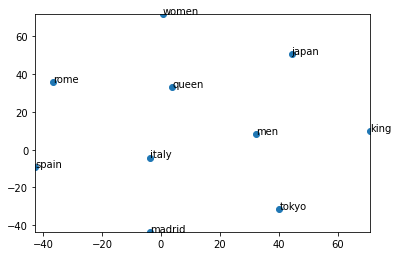

In [65]:
###################################################
# TODO: Visualize word vectors using TSNE.        #
#                                                 #
###################################################

def display_TSNE(model, wordlist):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = wordlist
    for word in wordlist:
        word_vector = model[word]
        arr = np.append(arr, np.array([word_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
display_TSNE(model,wordlist)
###################################################
# END TODO                                        #
###################################################